## Описание проекта

Выявим определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.

!!! Допущение проекта - равность стоимости игр!!!

### Основные понятия и описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### План действий
- загрузка данных (изучение общей информации);
- подготовка данных;
- исследовательский анализ данных;
- портрет пользователя каждого региона;
- проверка гипотез;
- общий вывод.

### Описание используемых столбцов
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка данных (изучение общей информации)

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import statistics

from scipy import stats as st
# from scipy.stats import binom, norm

# from math import sqrt

import warnings
import circlify

In [2]:
# библиотека для Circular Packing
!pip install circlify

In [3]:
# загружем данные
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('C:/Users/Student/Desktop/games.csv')

In [4]:
# pd.set_option('display.max_columns', None)
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
print(f"Всего строк: {len(df)}\n")
df.info()

Всего строк: 16715

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


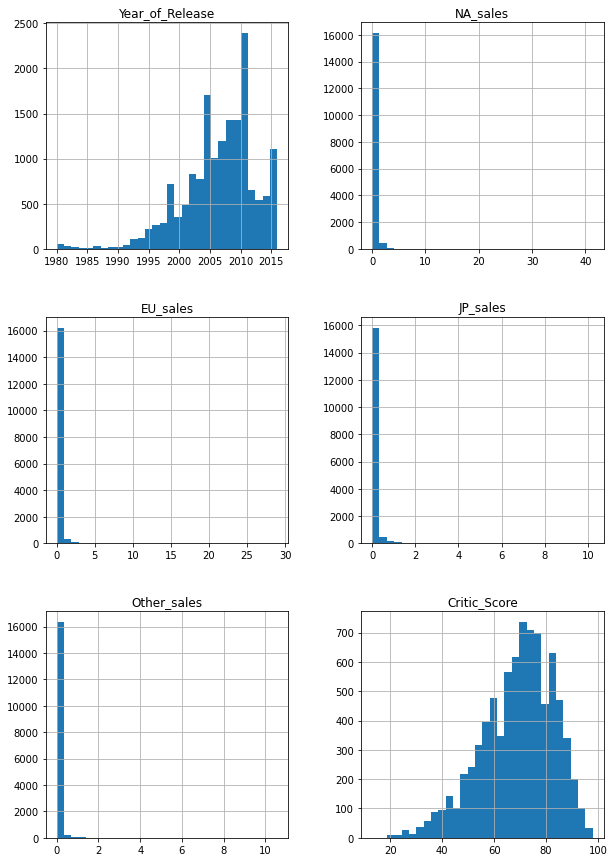

In [6]:
df.hist(figsize=(10, 15), bins=30)
plt.show()

###### Вывод по итогу изучения общей информации

- требуется изменить названия столбцов под змеиный регистр (названия на одном языке; из названий понятно, что в столбце);
- в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating` имеются пропуски;
- столбец `Year_of_Release` можно привести к типу int;
- столбец `User_Score` должен быть типа float;
- в гистограммах количества продаж имеются сильно выбивающиеся значения;
- столбец `Critic_Score` с оценками критиков имеет распределение Пуассона;
- столбец `Year_of_Release` имеет экcпоненциальное распределение, для проверки гипотез можно провести логарифмическое преобразование.

Данные старых игр также можно удалить, поскольку они менее релевантны.

## Подготовка данных

### Замена названий столбцов

In [7]:
# в цикле обработаем все пропуски и поочередно заменим на нижний регистр
# for column in df.columns.unique():
#     df = df.rename(columns={column: column.lower()})

# df.columns

In [8]:
df.columns = df.columns.str.lower()

### Обработка пропусков

Выведем количесство пропущенных значений для каждого столбца.

In [9]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Оценим доли пропусков по столбцам в процентах

In [10]:
df.isna().sum() / len(df) * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

Выясним, сколько всего копий всех игр продано за всё время, для оценки возможности удалить данные.

In [11]:
df['na_sales'].sum()

4402.35

In [12]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
len(df.loc[df['platform'] == 'GEN'])

29

Разберём пропуски:
- `name` и `genre` - не приятные пропуски, учитывая небольшое количество игр на пратформе и внушительное количество продаж одной из игр. Данные необходимо удалить.

Вероятно, возникли из-за человеческого фактора.

In [14]:
df.loc[df['year_of_release'].isna(), 'na_sales'].sum()

59.15

- `year_of_release` - целых 59 миллионов копий продано у игр, у которых не указан год. Однако, нам нужны данные для проверки гипотез, а не для бухгалтерии. Эти пропуски можно удалить.

Альтернативой может быть ручная проработка пропусков, путём поиска информации о конкретных играх или заполнение пропусков выбивающимся годом.

Вероятно, возникли из-за человеческого фактора.

In [15]:
df = df.dropna(subset=['name', 'year_of_release'])

In [16]:
print(f"Количество парных пропусков в столбцах с оценками и рейтингов = \
{len(df.loc[(df['critic_score'].isna()) & (df['user_score'].isna()) & (df['rating'].isna())])}")

Количество парных пропусков в столбцах с оценками и рейтингов = 6534


- `critic_score`, `user_score` и `rating` - столбцы имеют корреляцию.

Пропуски в столбцах с данными об оценках лучше не трогать, так как мы не можем восстановить их с достаточной точностью. Лучше оставить их как есть.

Пропуски имеют кореляцию и, вероятно, большая часть произошла из-за ошибки при записи данных. Часть могла возникнуть из-за человеческого фактора


### Преобразование данных в нужные типы

Столбец `year_of_release` приведем к типу int.

In [17]:
df['year_of_release'] = df['year_of_release'].astype('int')

Столбец `user_score` изучем подробнее

In [18]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [19]:
len(df.loc[df['user_score'] == 'tbd'])

2376

tbd - аббревиатура To Be Determined (будет определено). Поскольку значений слишком много, удалять их не следует. Однако, корректно обработать значение tbd мы не можем, обработаем все остальные значения, превратив их в тип данных float, заменив значения tbd на NaN.

Значения могли не перерести или возникли ошибки при переносе из источников. Обработать их можно или в ручную, или перезаписью данных по недостающим элементам.

!!!Для заполнения части пропусков!!!

Одним из вариантов может быть определение коэффециента соотношения средней оценки критиков к средней оценки пользователей. После чего записать данные по имеющимся оценкам критиков в пустые ячейки оценок пользователей. Однако вариант обладает высокой неточностью. проще данные оставить без изменений.

In [20]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

### Обработка дубликатов

Проверим наличие явных дубликатов

In [21]:
df.duplicated().sum()

0

Яные дубликаты в данных отсутствуют, проверим возможные неявные дубликаты в столбцах.

In [22]:
sorted(df['name'].unique())

[' Beyblade Burst',
 ' Fire Emblem Fates',
 " Frozen: Olaf's Quest",
 ' Haikyu!! Cross Team Match!',
 ' Tales of Xillia 2',
 "'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Ri

Видимые проблемы в названиях:
- у некоторых игр перед названием стоит проблел;
- у некоторых игр стоят приписки, которые необходимо удалить;

- могут присутствовать ошибки в регистре, однако, изучать все данные слишком долго и в предложенной выборке данная пролбема не наблюдается. (предположим, что такие дубликаты незначительны)
- также присутствуюи игры "2 in 1", в которых представлены 2 раздельные игры. При необходимости более детального анализа их можно разделить по названиям, просуммировав продажи и придумать, как усреднить оценки.

In [23]:
# создадим словарь удалим ненужную часть
to_replace = {    
    '.hack//G.U. Vol.1//': '',
    '.hack//': '',
    '.hack: ': '',
}
df['name'] = df['name'].replace(to_replace, regex=True)


# удалим пробелы перед названиями
df['name'] = df['name'].str.lstrip()

### Обработка выбросов


### Создание столбца с суммарными продажами

In [24]:
df['sales'] = df[['na_sales', 'eu_sales', 'jp_sales']].sum(axis=1)

In [25]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38


### Вывод по итогу подготовки данных

- изменены названия столбцов под змеиный регистр;
- в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score` и `rating` имеются пропуски. Часть из них обработана;
- столбец `year_of_release` приведен к типу int;
- столбец `user_score` приведен к типу float, для численных значений;
- обработаны дубликаты;
- создан столбец с суммарными продажами игр.

## Исследовательский анализ данных

### Распределение игр по годам 

Оценим, важны ли все временные промежутки.

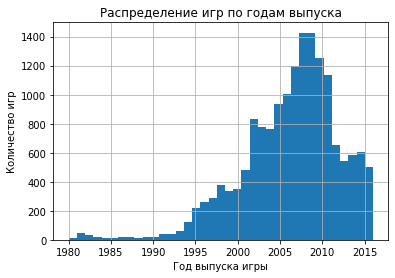

In [26]:
df.hist('year_of_release', bins=37)
plt.title("Распределение игр по годам выпуска")
plt.xlabel("Год выпуска игры")
plt.ylabel("Количество игр")
plt.show()

# data_rides['distance'].describe()

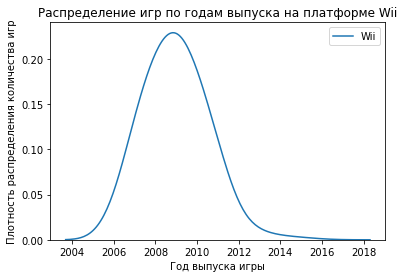

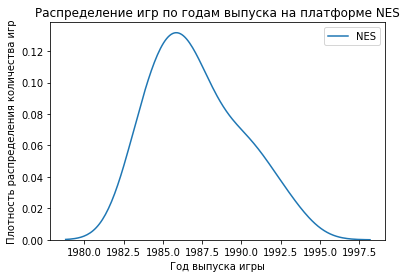

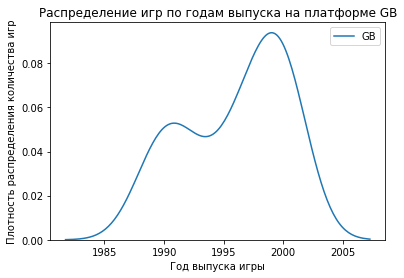

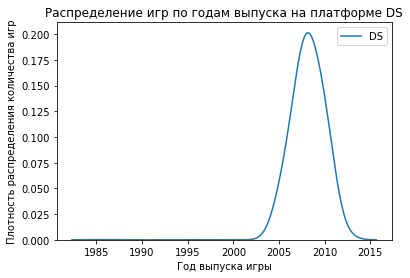

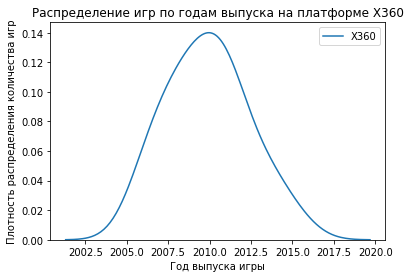

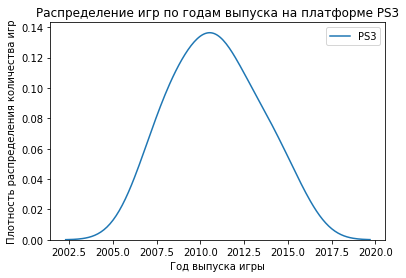

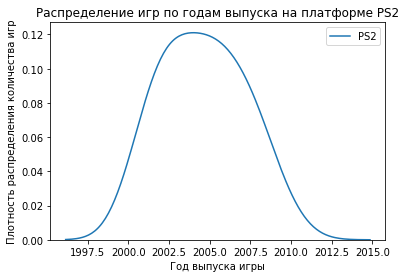

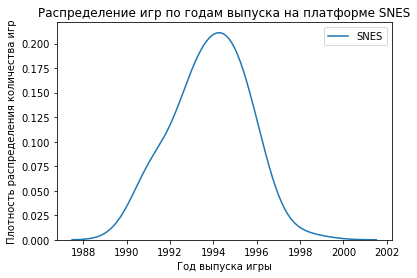

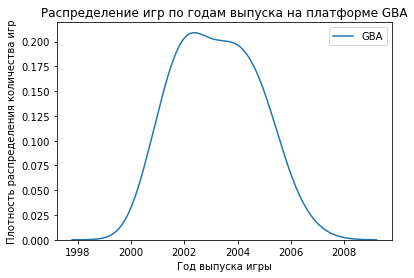

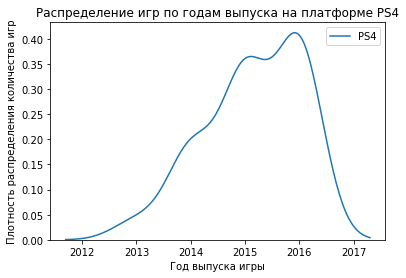

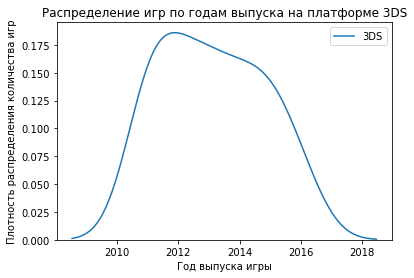

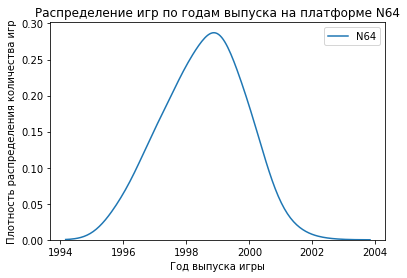

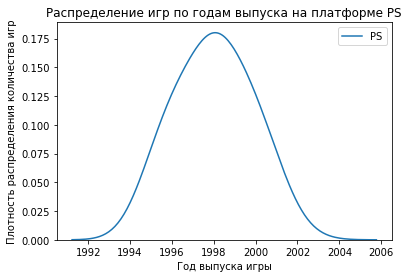

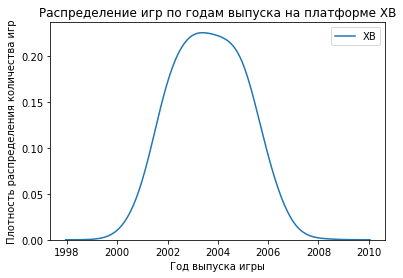

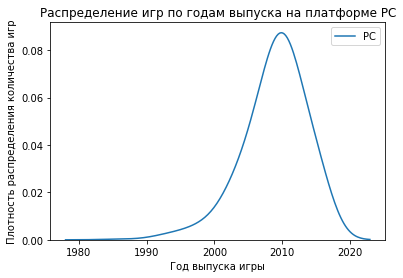

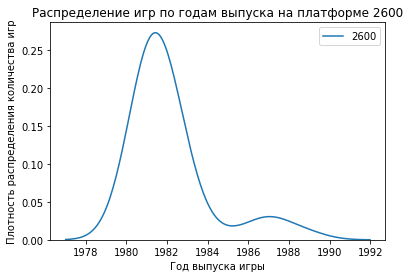

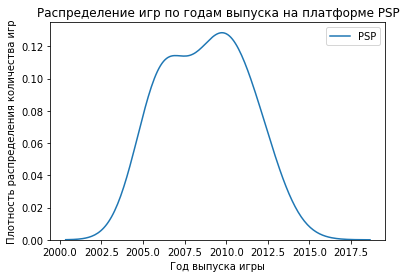

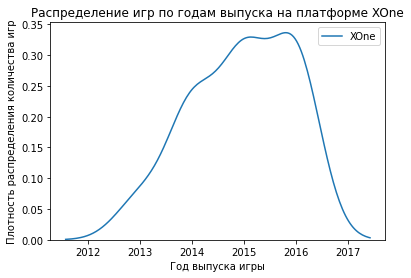

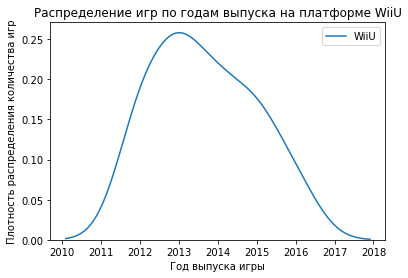

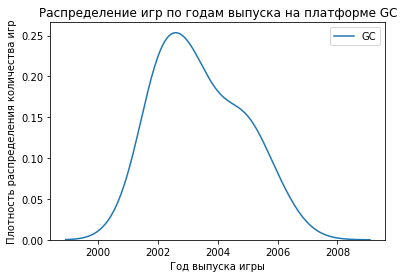

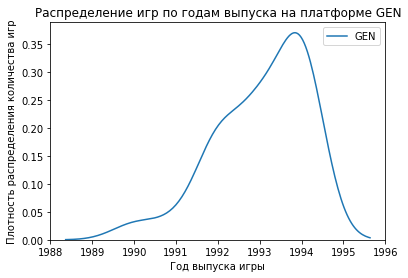

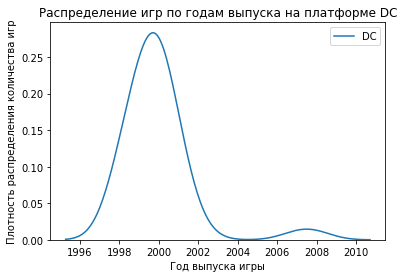

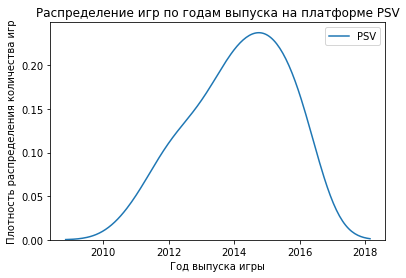

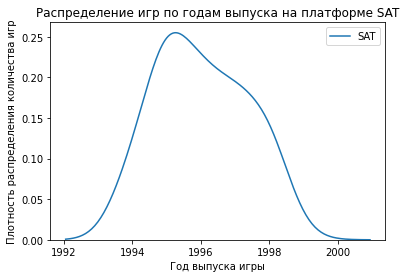

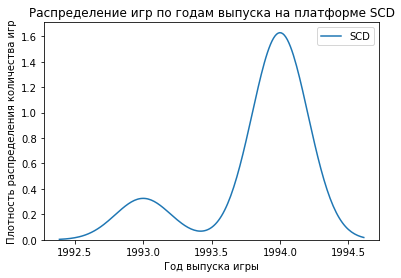

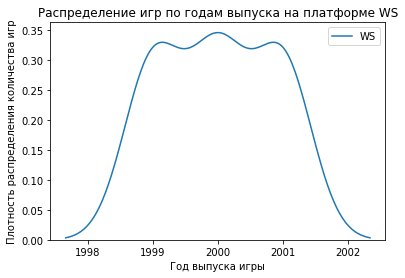

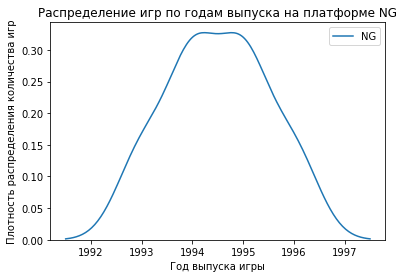

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


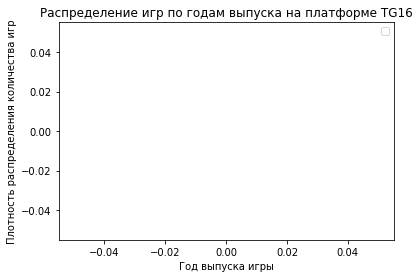

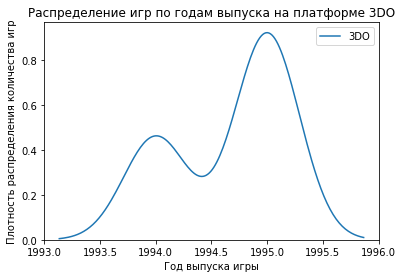

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


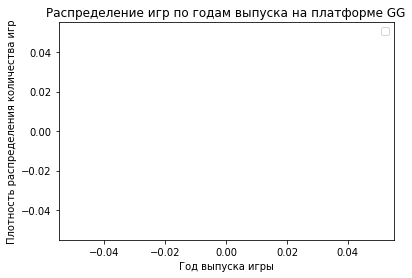

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


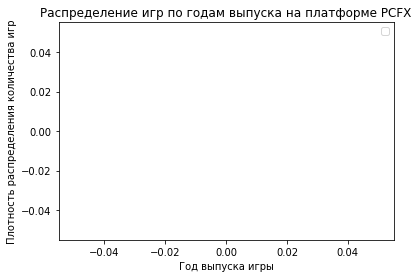

In [27]:
# plt.subplots(figsize=(15, 8))

for platform in df['platform'].unique():
    sns.kdeplot(data=df.query('platform == @platform'), x="year_of_release", label=platform, bw_method=0.5)
    plt.legend()
    plt.title(f"Распределение игр по годам выпуска на платформе {platform}")
    plt.xlabel("Год выпуска игры")
    plt.ylabel("Плотность распределения количества игр")
    plt.show()
    
    
# plt.legend()
# plt.title("Распределение игр по годам выпуска")
# plt.xlabel("Год выпуска игры")
# plt.ylabel("Плотность распределения количества игр")
# plt.show()
# warnings.simplefilter('ignore')

Столбцом, где можно было бы обработать выбросы является столбец `year_of_release` (ввиду малой актуальности).
Также по графику видно, что актуальный средний цикл жизни консолей составляет 5 лет.

Можно взять игры за последние 5 лет. Также уберем 2016 год, поскольку данные за него могут быть не полными


In [28]:
df_actual = df[(df['year_of_release'] >= max(df['year_of_release']-6)) \
               & (df['year_of_release'] < max(df['year_of_release']))]

### Распределение игр по платформам

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

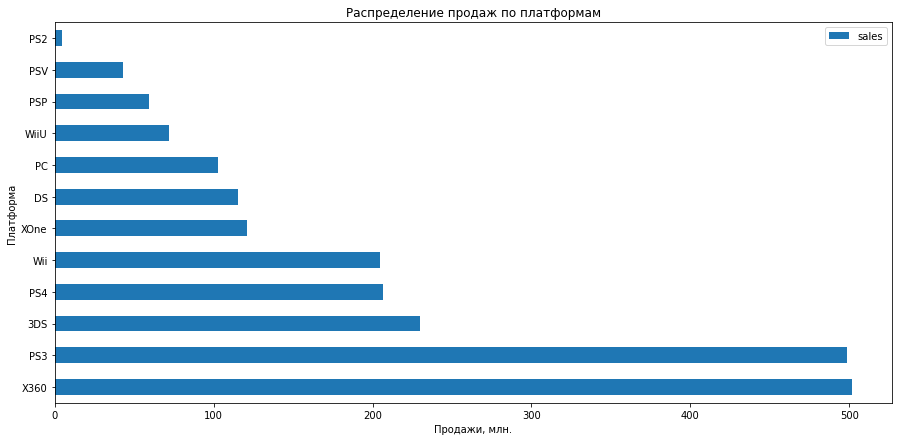

In [29]:
(df_actual
 .pivot_table(index='platform', values='sales', aggfunc='sum')
 .sort_values(by='sales', ascending=False)
 .plot.barh(figsize=(15, 7))
)

plt.title("Распределение продаж по платформам")
plt.xlabel("Продажи, млн.")
plt.ylabel("Платформа")
plt.show()

Видим платформы, на которых число продаж крайне мало. Рассмотрим внимательнее распределение продаж на этих платформах по годам.

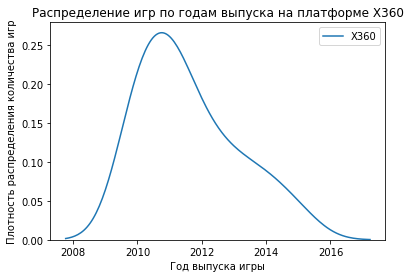

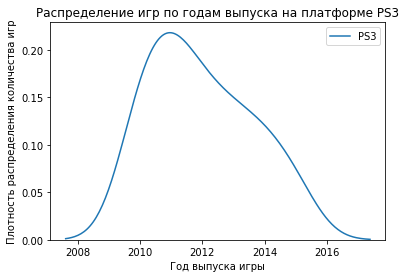

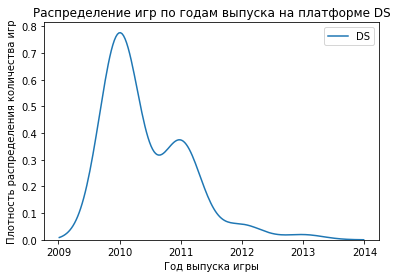

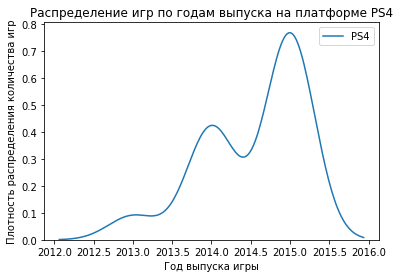

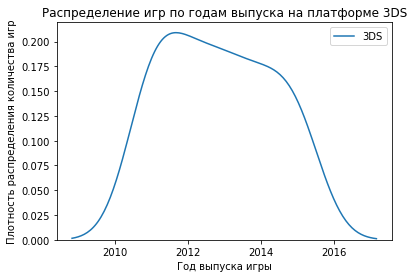

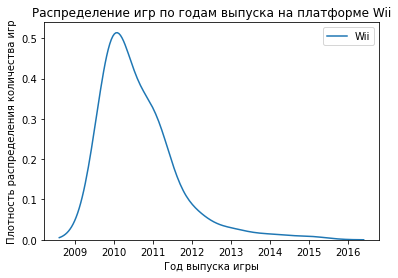

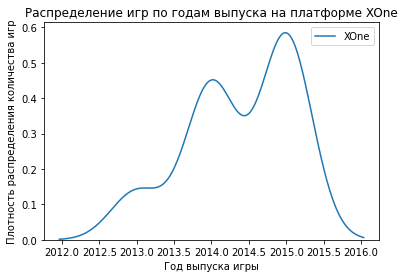

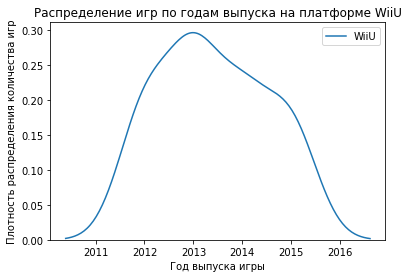

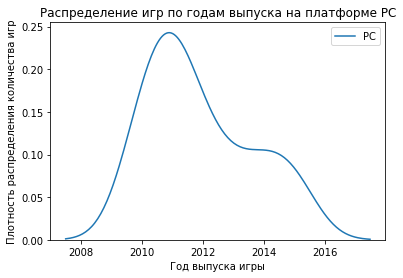

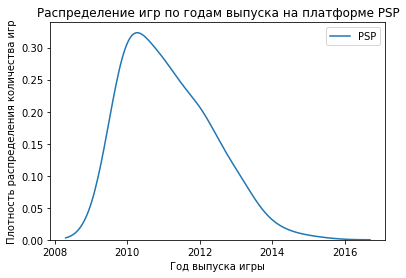

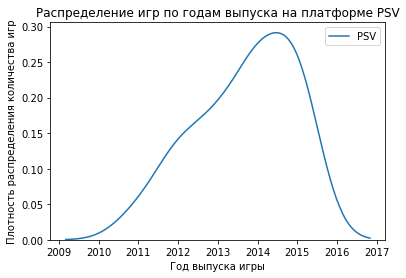

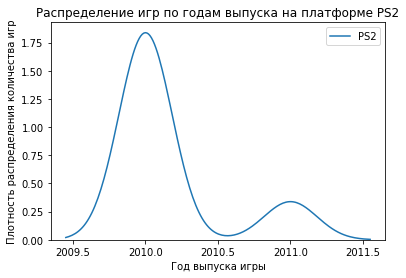

In [30]:
# plt.subplots(figsize=(15, 8))

for platform in df_actual['platform'].unique():
    sns.kdeplot(data=df_actual.query('platform == @platform'), x="year_of_release", label=platform, bw_method=0.5)
    plt.legend()
    plt.title(f"Распределение игр по годам выпуска на платформе {platform}")
    plt.xlabel("Год выпуска игры")
    plt.ylabel("Плотность распределения количества игр")
    plt.show()
    
# plt.legend()
# plt.title("Распределение игр по актуальным годам выпуска")
# plt.xlabel("Год выпуска игры")
# plt.ylabel("Плотность распределения количества игр")
# plt.show()

Начнем разбираться с платформами в ручную:
- средний цикл жизни приставки около пяти лет. Самые актуальные на данный момент приставки PS4 и XOne;
- 3DS хоть и имеетне не плохие показатели, но заканчивает свой цикл (лучше подождать от производителей следующую модель и разрабатывать игру на ее платформе). График схож с графиком для PS2;
- уберем прискавки, у которых продажа игр за 2015 год менее 5 миллионов;
- также следует оставить PC, поскольку платформа является обновляемой.
- PSV и WiiU менее перспективны, однако падение продаж у них и у PC, 3DS может быть связано с общим падением продаж.

In [31]:
need_platform = []

for platform in df_actual['platform'].unique():
    sum_2015 = df_actual.query('platform == @platform and year_of_release == 2015')['sales'].sum()
    if sum_2015 > 5:
        need_platform.append(platform)
print(f"Список наиболее актуальных платформ: {need_platform}")

Список наиболее актуальных платформ: ['X360', 'PS3', 'PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV']


In [32]:
df_actual = df_actual.query('platform in @need_platform')

Построим гистограммы размаха по глобальным продажам игр в разбивке по наиболее актуальным платформам

- на данный момент наиболее актуальными и перспективными являются платформы 'PS4' и 'XOne'. Также актуальными остаются следующие платформы:'PC', 'X360', 'PS3', '3DS', 'WiiU', 'PSV'.

In [33]:
# plt.subplots(figsize=(15, 10))

# # boxplot
# ax = sns.boxplot(x='platform', y='sales', data=df_actual)
# # add stripplot
# ax = sns.stripplot(x='platform', y='sales', data=df_actual, color="orange", jitter=0.2, size=2.5)

# plt.title("Гистограммы размаха по глобальным продажам игр в разбивке по наиболее актуальным платформам ")
# plt.xlabel("Платформа")
# plt.ylabel("Размах продаж / Количество продаж, млн.")
# plt.show()

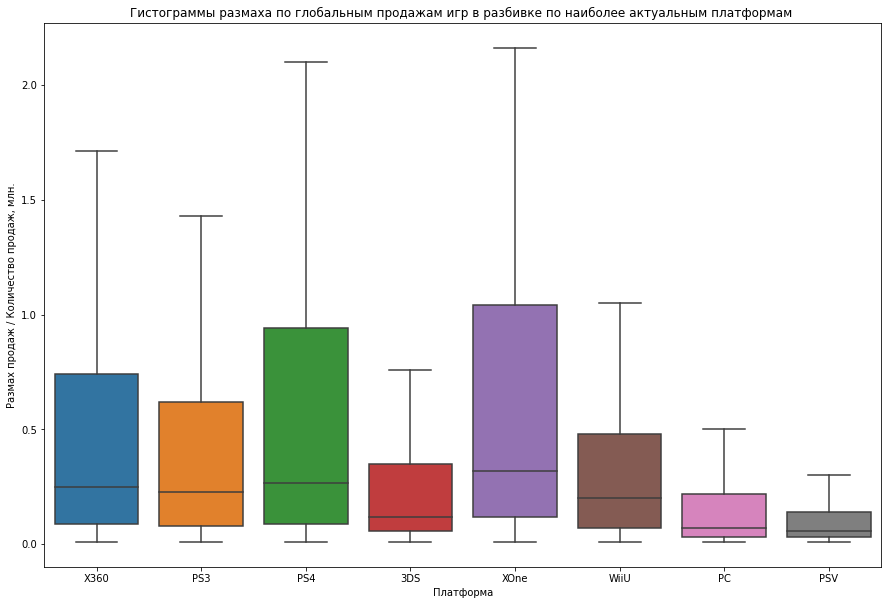

In [34]:
plt.subplots(figsize=(15, 10))

# boxplot
ax = sns.boxplot(x='platform', y='sales', data=df_actual, showfliers=False)
# add stripplot


plt.title("Гистограммы размаха по глобальным продажам игр в разбивке по наиболее актуальным платформам ")
plt.xlabel("Платформа")
plt.ylabel("Размах продаж / Количество продаж, млн.")
plt.show()

- учитывая успех предыдущих поколений консолей 'X360' и 'PS3', следует сделать выбор в пользу их новых версий: 'XOne' и 'PS4';
- 'PC', '3DS' и 'WiiU' - бóльшая игр расположена ниже даже медианных значений для обеих поколений 'PS' и 'X';
- 'PSV' - гипотеза: малый рынок, актуальность слишком мала, не будем считать её актуальной;
- 'X360' и 'PS3' не будем считать перспективными для будущих разработок ввиду скорого устаревания.

In [35]:
not_actual = ['X360','PS3','PSV']
df_actual = df_actual.query('platform not in @not_actual')
print(f"Актуальные платформы: {df_actual['platform'].unique()}")

Актуальные платформы: ['PS4' '3DS' 'XOne' 'WiiU' 'PC']


### Влияние на продажи отзывов пользователей и критиков (внутри одной популярной платформы)

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для Одной из популярных и актуальных консолей на данный момент.

In [36]:
platform = 'PS4'

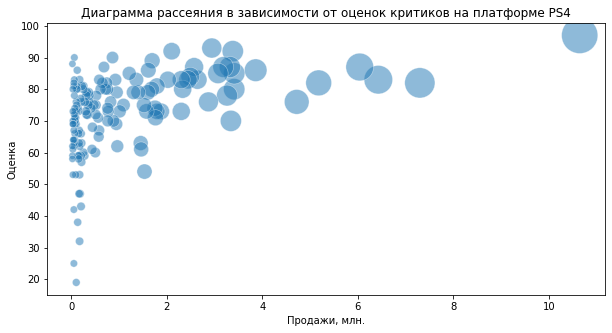

In [37]:
plt.subplots(figsize=(10, 5))
sns.scatterplot(data=df_actual.query('platform == @platform'),
                x="sales",
                y="critic_score",
                size="sales",
                legend=False,
                sizes=(50, 1500),
                alpha=0.5)

plt.title(f"Диаграмма рассеяния в зависимости от оценок критиков на платформе {platform}")
plt.xlabel("Продажи, млн.")
plt.ylabel("Оценка")
plt.show()

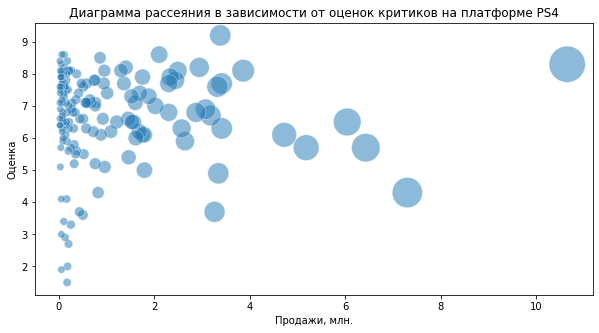

In [38]:
plt.subplots(figsize=(10, 5))
sns.scatterplot(data=df_actual.query('platform == @platform'),
                x="sales",
                y="user_score",
                size="sales",
                legend=False,
                sizes=(50, 1500),
                alpha=0.5)

plt.title(f"Диаграмма рассеяния в зависимости от оценок критиков на платформе {platform}")
plt.xlabel("Продажи, млн.")
plt.ylabel("Оценка")
plt.show()

In [39]:
print(f"Коэффициент корреляции продаж к оценкам пользователей на платформе {platform}: \
{df_actual.query('platform == @platform')['sales'].corr(df_actual.query('platform == @platform')['user_score'])}")

print(f"Коэффициент корреляции продаж к оценкам критиков на платформе {platform}: \
{df_actual.query('platform == @platform')['sales'].corr(df_actual.query('platform == @platform')['critic_score'])}")

print(f"Коэффициент корреляции оценок пользователей к оценкам критиков на платформе {platform}: \
{df_actual.query('platform == @platform')['user_score'].corr(df_actual.query('platform == @platform')['critic_score'])}")

Коэффициент корреляции продаж к оценкам пользователей на платформе PS4: 0.02464881165109381
Коэффициент корреляции продаж к оценкам критиков на платформе PS4: 0.43112439223919796
Коэффициент корреляции оценок пользователей к оценкам критиков на платформе PS4: 0.61245091268124


###### Вывод по влиянию на продажи внутри популярной платформы:
- гипотерзы: критики анализируют игры и лучше оценивают успешность игры. Видна явная зависимость роста продаж и оценок;
- с оценками пользователей сложнее, поскольку они оценивают игру не с точки зрения анализа. Поэявляется слишком много сторонних факторов. Например, отношение к издателю или темы, затронутые в сюжете игры;
- это может обладать и обратным эффектом, когда критики стараются угодить массовому пользователю или, когда критики выступают в качестве способа рекламы продукта.

Коэффициент Пирсона:
- коэффециент (0.02) указывает на слабую положительную корреляцию оценок пользователей и суммарных продаж;
- коэффециент (0.43) указывает на среднюю положительную корреляцию оценок критиков и суммарных продаж;
- коэффециент (0.61) указывает на положительную корреляцию. С ростом оценок пользователей растут и оценки критиков.

По коээфециенту Пирсона можно сказать, что оценки критиков лучше отображают успешность игры.



Соотнесем выводы с продажами игр на других платформах

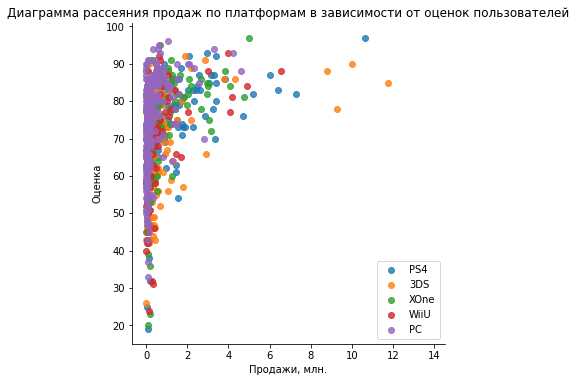

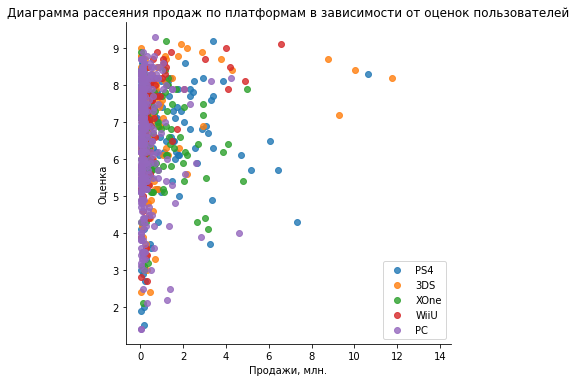

In [40]:
sns.lmplot( x="sales", y="critic_score", data=df_actual, fit_reg=False, hue='platform', legend=False)
plt.legend(loc='lower right')

plt.title("Диаграмма рассеяния продаж по платформам в зависимости от оценок пользователей")
plt.xlabel("Продажи, млн.")
plt.ylabel("Оценка")
plt.show()

sns.lmplot( x="sales", y="user_score", data=df_actual, fit_reg=False, hue='platform', legend=False)
plt.legend(loc='lower right')

plt.title("Диаграмма рассеяния продаж по платформам в зависимости от оценок пользователей")
plt.xlabel("Продажи, млн.")
plt.ylabel("Оценка")
plt.show()

По всем популярным и актуальным платформа ситуация схожая.

Рассмотрим средний по платформам коэффециент корреляции:

In [41]:
print(f"Коэффициент корреляции продаж к оценкам пользователей: \
{df_actual['sales'].corr(df_actual['user_score'])}")

print(f"Коэффициент корреляции продаж к оценкам критиков: \
{df_actual['sales'].corr(df_actual['critic_score'])}")

print(f"Коэффициент корреляции оценок пользователей к оценкам критиков: \
{df_actual['user_score'].corr(df_actual['critic_score'])}")

Коэффициент корреляции продаж к оценкам пользователей: 0.10463443668713683
Коэффициент корреляции продаж к оценкам критиков: 0.32799152826952
Коэффициент корреляции оценок пользователей к оценкам критиков: 0.5478994725370989


Видим немного отличающиеся значения, однако, не столь критичные для общей картины.

### Общее распределение игр по жанрам

Рассмотрим, что можно сказать о самых прибыльных жанрах. Выделяются ли жанры с высокими и низкими продажами?

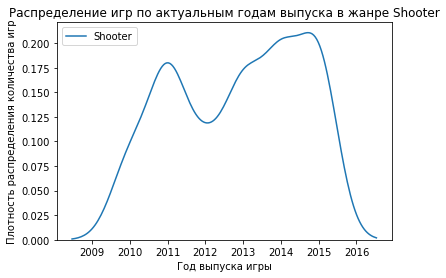

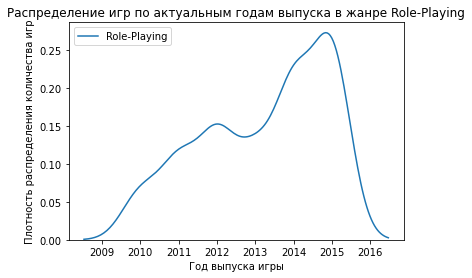

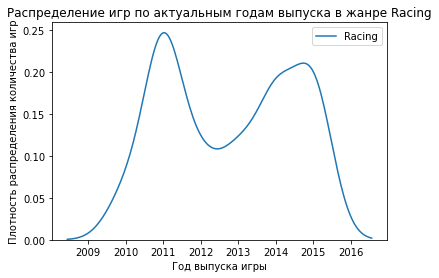

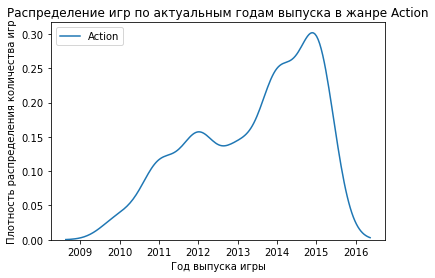

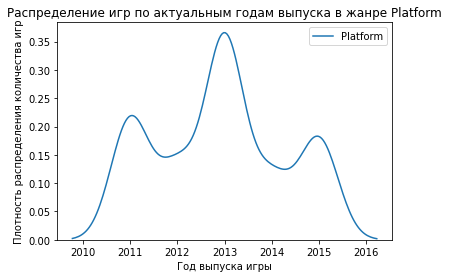

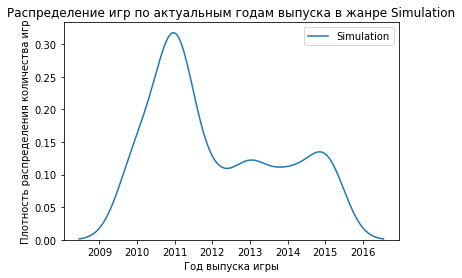

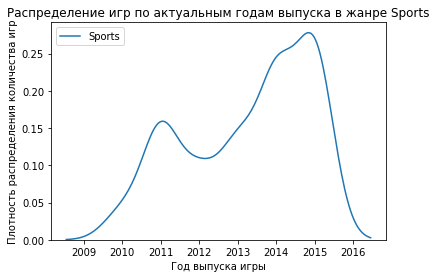

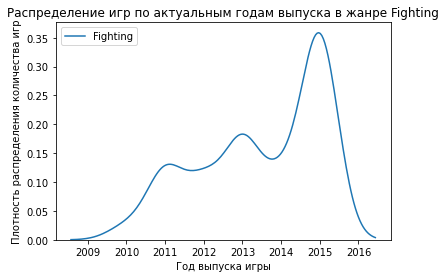

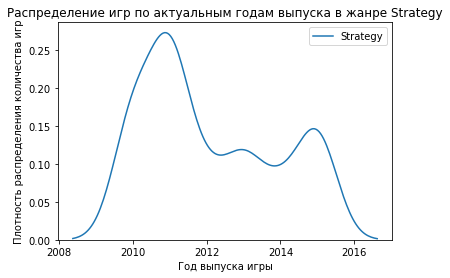

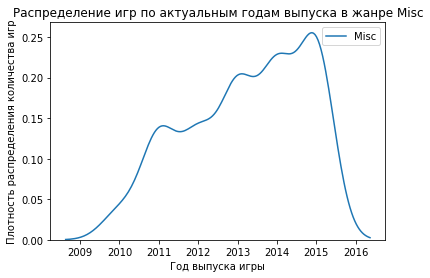

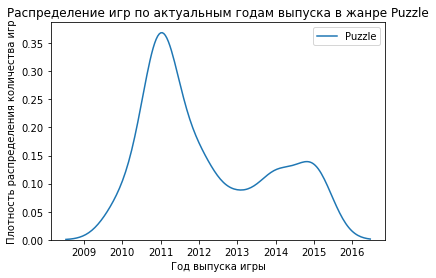

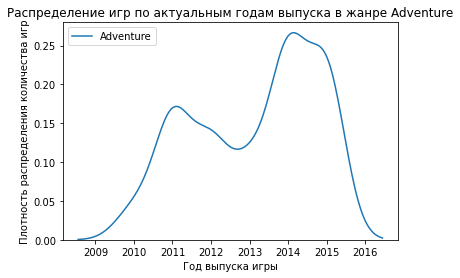

In [42]:
# plt.subplots(figsize=(15, 8))

for genre in df_actual['genre'].unique():
    sns.kdeplot(data=df_actual.query('genre == @genre'), x="year_of_release", label=genre, bw_method=0.3)
    plt.legend()
    plt.title(f"Распределение игр по актуальным годам выпуска в жанре {genre}")
    plt.xlabel("Год выпуска игры")
    plt.ylabel("Плотность распределения количества игр")
    plt.show()
    
    
# plt.legend()
# plt.title("Распределение игр по актуальным годам выпуска")
# plt.xlabel("Год выпуска игры")
# plt.ylabel("Плотность распределения количества игр")
# plt.show()

In [43]:
# создадим список из жанров с наибольшим количеством продаж и наиболее актуальных
most_profit_value = []
mid_profit_value = []
low_profit_value = []

for genre in df_actual['genre'].unique():
    genre_sum = df_actual.loc[(df_actual['genre'] == genre) &
                                   (df_actual['year_of_release'] == 2015), 'sales'].sum()
    if genre_sum > 20:
        most_profit_value.append(genre)
    elif genre_sum <= 20 and genre_sum > 5:
        mid_profit_value.append(genre)
    else:
        low_profit_value.append(genre)

print(f"Самые популярные жанры: {most_profit_value}")
print(f"Обычные жанры: {mid_profit_value}")
print(f"Самые не популярные жанры: {low_profit_value}")

Самые популярные жанры: ['Shooter', 'Role-Playing', 'Action', 'Sports']
Обычные жанры: ['Racing', 'Platform', 'Fighting', 'Misc']
Самые не популярные жанры: ['Simulation', 'Strategy', 'Puzzle', 'Adventure']


- жанры 'Simulation', 'Strategy' и 'Puzzle' являются наименее актуальными и на графике показывают снижение спроса;
- жанры 'Racing', 'Platform', 'Fighting', 'Misc' и 'Adventure' имеют не плохую аудиторию, но до титула "популярные" им далеко;
- в это же время 'Shooter', 'Role-Playing', 'Action' и 'Sports' являются самыми популярными жанрам.

In [44]:
# plt.subplots(figsize=(15, 10))

# # boxplot
# ax = sns.boxplot(x='genre', y='sales', data=df_actual)
# # add stripplot
# ax = sns.stripplot(x='genre', y='sales', data=df_actual, color="orange", jitter=0.3, size=2.5)

# plt.title("Гистограммы размаха по глобальным продажам игр в разбивке по жанрам ")
# plt.xlabel("Жанр")
# plt.ylabel("Размах продаж / Количество продаж, млн.")
# plt.show()

~~ Видим высокое значение третьего квартиля у жанра 'Platform', однако это скорее обусловлено маленькой выборкой. ~~

###### Вывод по влиянию на продажи внутри жанров:
- жанры 'Simulation', 'Strategy' и 'Puzzle' являются наименее актуальными и на графике показывают снижение спроса;
- жанры 'Racing', 'Platform', 'Fighting', 'Misc' и 'Adventure' имеют не плохую аудиторию, но до титула "популярные" им далеко;
- жарны 'Shooter', 'Role-Playing', 'Action' и 'Sports' являются самыми популярными жанрам.

### Вывод по итогу исследовательского анализа данных
Обзор платформ:
- в датафрейме представлены данные с 1980 года;
- средний цикл жизни платформы около 5 лет. Однако, имеются универсальные платформы, например, 'PC';
- платформы 'X360', 'PS3' находятся в конце своего жизненного цикла, их лучше не учитывать (прошлое поколение актуальных консолей);
- платформы '3DS', 'WiiU' и 'PSV' обладают сомнительно актуальностьюй и находтся на пике или в его конце.


- на данный момент наиболее актуальными и перспективными являются платформы 'PS4' и 'XOne'. Также актуальными остаются следующие платформы: '3DS', 'PC', 'WiiU';


Гипотерзы по соотношению оценок и продаж:
- критики анализируют игры и лучше оценивают успешность игры. Видна явная зависимость роста продаж и оценок;
- с оценками пользователей сложнее, поскольку они оценивают игру не с точки зрения анализа. Поэявляется слишком много сторонних факторов. Например, отношение к издателю или темы, затронутые в сюжете игры;
- это может обладать и обратным эффектом, когда критики стараются угодить массовому пользователю или, когда критики выступают в качестве способа рекламы продукта.


- по коээфециенту Пирсона можно сказать, что оценки критиков (corr = 0.33) лучше отображают успешность игры, чем оценки пользователей (corr = 0.10). Однако, между собой у них довольно исльная положительная корреляция (corr = 0.54).
- стоит за метить, что на 'PS4' показатель корреляции для оценок критиков сильнее (corr = 0.43), в то время, как корреляция оценок пользователей почти нулеваю (corr = 0.02). Если задать переменной 'platform' значение 'XOne', мы увидим схожие показатели и графики.

Разбор популярности жанров:
- жанры 'Simulation', 'Strategy' и 'Puzzle' являются наименее актуальными и на графике показывают снижение спроса;
- жанры 'Racing', 'Platform', 'Fighting', 'Misc' и 'Adventure' имеют не плохую аудиторию, но до титула "популярные" им далеко;
- жарны 'Shooter', 'Role-Playing', 'Action' и 'Sports' являются самыми популярными жанрам.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишим различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы по регионам

Поскольку старые пользователи уже могли перестать играть, а нам нужны актуальные данные, будем использовать таблицу с актуальными данными за последние 5 лет (в данном пункте отбросим вопрос перспективности).

In [51]:
regions = ['jp_sales', 'eu_sales', 'na_sales']
df_regions = (df.query('year_of_release >= 2010 and year_of_release <= 2015'))

In [52]:
# regions = ['jp_sales', 'eu_sales', 'na_sales']
# df_regions = (df
#      .query('year_of_release >= 2010 and year_of_release <= 2015')
#      .pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
# #      .sort_values(by=region, ascending=False)
#     )

# ax1 = df_regions.plot.hist(bins=7, alpha=0.7, stacked=True)


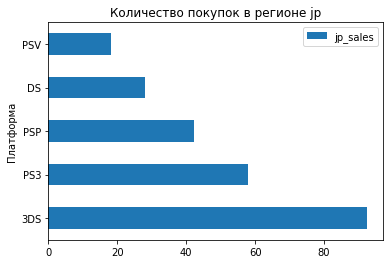

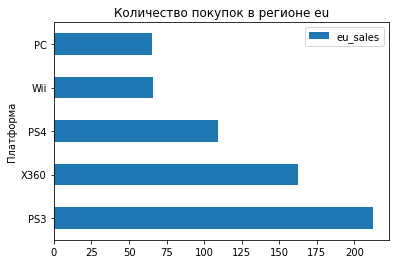

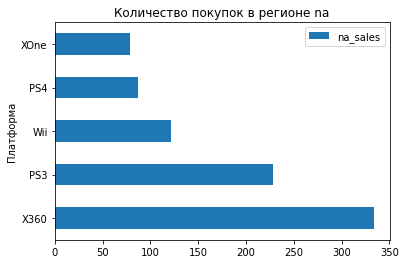

In [54]:
for region in regions:
    (df_regions
     .pivot_table(index='platform', values=region, aggfunc='sum')
     .sort_values(by=region, ascending=False)
     .head()
     .plot.barh(y=region)
    )
    plt.title(f"Количество покупок в регионе {region.split('_')[0]}")
    plt.ylabel("Платформа")
    plt.show()

- рынки Северной Америки и Европы схожи в выборе платформ. Однако, на рынке Северной Америке (у популярных платформ от 80 до 300 миллионов проданных игр) у платформы в среднем на 50% больше продаж, чем в Европе (у популярных платформ от 50 до 200 миллионов проданных игр);
- рынок Японии уникален тем, что их пользователи предпочитают портативные консоли. 4 из 5 ('PSV', 'PSP', 'DS', '3DS') самых популярных консолей - портативные. А также он меньший из представленных (у популярных платформ от 20 до 90 миллионов проданных игр).

### Самые популярные жанры по регионам

Рассмотрим туже выборку за 5 лет.

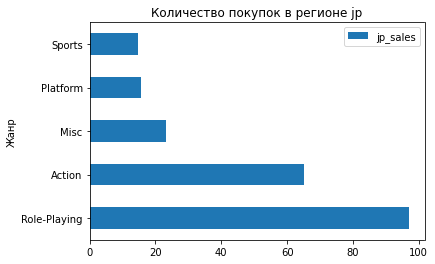

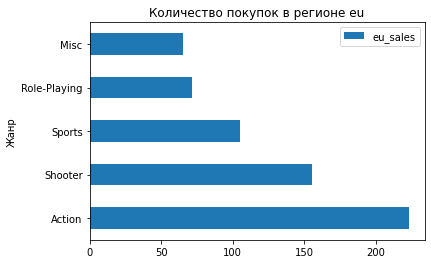

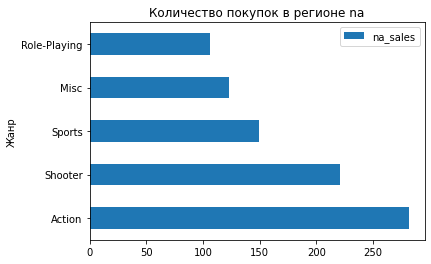

In [55]:
for region in regions:
    (df_regions
     .pivot_table(index='genre', values=region, aggfunc='sum')
     .sort_values(by=region, ascending=False)
     .head()
     .plot.barh(y=region)
    )
    plt.title(f"Количество покупок в регионе {region.split('_')[0]}")
    plt.ylabel("Жанр")
    plt.show()

- рынки Северной Америки и Европы схожи в выборе жанра (самый популярный 'Action'). На рынке Северной Америке (у популярных жанров от 100 до 250 миллионов проданных игр) у популярных жанров в среднем на 20% больше продаж, чем в Европе (у популярных жанров от 70 до 220 миллионов проданных игр);
- рынок Японии уникален тем, что их пользователи предпочитают два конкретных жанра всем другим, это : 'Action' и 'Role-Playing' (у популярных жанров от 15 до 90 миллионов проданных игр).

### Влияние рейтинга ESRB по регионам

Рассмотрим туже выборку за 5 лет.

Категории рейтинга:
- «EC» («Early childhood») — «Для детей младшего возраста»;
- «E» («Everyone») — «Для всех» (Первоначально "K-A" ("Kids to Adults"));
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет;
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет;
- «AO» («Adults Only 18+») — «Только для взрослых»;
- «RP» («Rating Pending») — «Рейтинг ожидается». (Продукт был отправлен в ESRB и ожидает присвоения рейтинга);
- «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+». (Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M»);

Значение "K-A" можно считать неявным дубликатом. Устраним его сейчас, на предыдущие вычисления это не влияет.

In [56]:
df.loc[(df['rating'] == 'K-A'), 'rating'] = 'E'

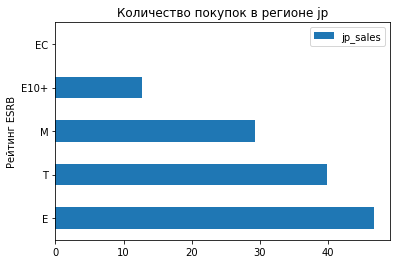

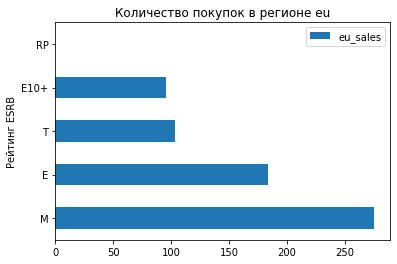

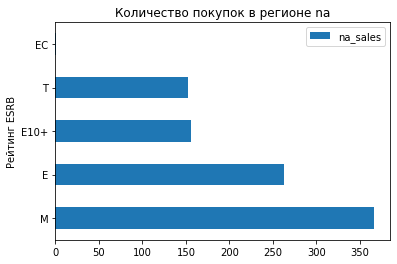

In [57]:
for region in regions:
    (df_regions
     .pivot_table(index='rating', values=region, aggfunc='sum')
     .sort_values(by=region, ascending=False)
     .head()
     .plot.barh(y=region)
    )
    plt.title(f"Количество покупок в регионе {region.split('_')[0]}")
    plt.ylabel("Рейтинг ESRB")
    plt.show()

Издатели игр следят, чтобы в их игры могли поиграть как можно больше человек.
- рынки Северной Америки и Европы схожи в выборе игр с рейтингом 'М';
- рынок Японии снова уникален, их пользователи отдают предпочтение в первую очередь играм с рейтингом 'E';
- стоит заметить, что во всех регионах преобладают следующие четыре рейтинга: 'E', 'M', 'T', 'E10+'.

### Вывод по итогу изучению портретов пользователей

Распределение платформ по регионам:
- рынки Северной Америки и Европы схожи в выборе платформ. Однако, на рынке Северной Америке (у популярных платформ от 80 до 300 миллионов проданных игр) у платформы в среднем на 50% больше продаж, чем в Европе (у популярных платформ от 50 до 200 миллионов проданных игр);
- рынок Японии уникален тем, что их пользователи предпочитают портативные консоли. 4 из 5 ('PSV', 'PSP', 'DS', '3DS') самых популярных консолей - портативные. А также он меньший из представленных (у популярных платформ от 20 до 90 миллионов проданных игр).

Распределение жанров по регионам:
- рынки Северной Америки и Европы схожи в выборе жанра (самый популярный 'Action'). На рынке Северной Америке (у популярных жанров от 100 до 250 миллионов проданных игр) у популярных жанров в среднем на 20% больше продаж, чем в Европе (у популярных жанров от 70 до 220 миллионов проданных игр);
- рынок Японии уникален тем, что их пользователи предпочитают два конкретных жанра всем другим, это : 'Action' и 'Role-Playing' (у популярных жанров от 15 до 90 миллионов проданных игр).

Влияние рейтинга ESRB по регионам:
- рынки Северной Америки и Европы схожи в выборе игр с рейтингом 'М';
- рынок Японии снова уникален, их пользователи отдают предпочтение в первую очередь играм с рейтингом 'E';
- стоит заметить, что во всех регионах преобладают следующие четыре рейтинга: 'E', 'M', 'T', 'E10+'.

###### Портрет пользователя каждого региона
Япония:
- любимая приставка: 3DS;
- любимый жанр: Role-Playing;
- любимый рейтинг ESRB: ;

Европа:
- любимая приставка: PS3;
- любимый жанр: Action;
- любимый рейтинг ESRB: «M» («Mature») — «Для взрослых»;

Северная Америка:
- любимая приставка: X360;
- любимый жанр: Action;
- любимый рейтинг ESRB: «M» («Mature») — «Для взрослых»;

## Проверка гипотез


### Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC

Проверим, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

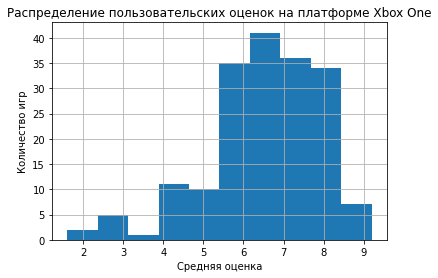

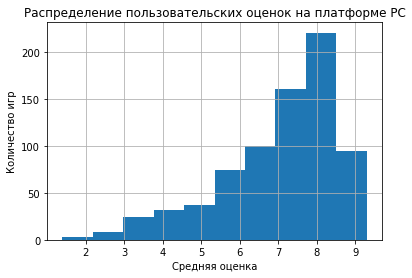

In [58]:
df.query('platform == "XOne"').hist('user_score')
plt.title("Распределение пользовательских оценок на платформе Xbox One")
plt.xlabel("Средняя оценка")
plt.ylabel("Количество игр")
plt.show()

df.query('platform == "PC"').hist('user_score')
plt.title("Распределение пользовательских оценок на платформе PC")
plt.xlabel("Средняя оценка")
plt.ylabel("Количество игр")
plt.show()

Поскольку рейтинг принимает не только целочисленные значения, нельзя считать это распределением Пуассона. 

Распределения имеет нормальный вид со смещением в большую сторону, однако дисперсия у них будет отличаться из-за размера выборки.

Используем метод `scipy.stats.ttest_ind()`, поскольку необходимо сравнить 2 набора данных, которые не зависят друг от друга.
- нулевая гипотеза - пользовательские рейтинги платформ Xbox One и PC одинаковые;
- альтернативная гипотеза - пользовательские рейтинги платформ Xbox One и PC разные.

In [59]:
# Датасет без пропусков для работы ttest
df_ttest = df.dropna(subset=['user_score'])

In [60]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(df_ttest.query('platform == "PC"')['user_score'],
                       df_ttest.query('platform == "XOne"')['user_score'],
                       equal_var=False)
# False, т.к. размеры выборок значительно отличаются; проверка двухсторонняя

# выведите на экран получившееся p-значение
print('p-значение:', results.pvalue)
# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


In [61]:
print("Список характерных значений оценок пользователей на платформе Xbox One:")
df_ttest.query('platform == "XOne"')['user_score'].describe()

Список характерных значений оценок пользователей на платформе Xbox One:


count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [62]:
print("Список характерных значений оценок пользователей на платформе PC:")
df_ttest.query('platform == "PC"')['user_score'].describe()

Список характерных значений оценок пользователей на платформе PC:


count    755.000000
mean       7.065960
std        1.532718
min        1.400000
25%        6.200000
50%        7.500000
75%        8.200000
max        9.300000
Name: user_score, dtype: float64

Метод describe подтверждает, что выдвинутую нулевую гипотезу следует отвергнуть. По списку характерный значений видно, что имеет место альтернативная гипотеза о том, что оценки отличаются.

Можно выдвинуть гипотезу, что оценки у Xbox One лучше, чем у PC.

### Гипотеза о разности средних пользовательских рейтингов жанров Action и Sports

Проверим, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

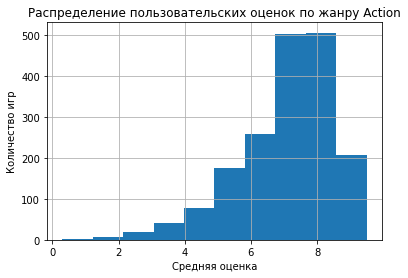

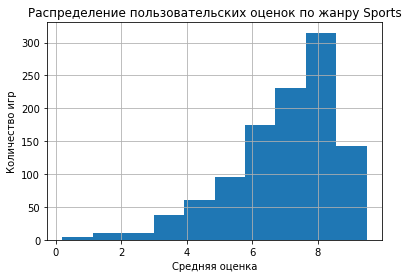

In [63]:
df.query('genre == "Action"').hist('user_score')
plt.title("Распределение пользовательских оценок по жанру Action")
plt.xlabel("Средняя оценка")
plt.ylabel("Количество игр")
plt.show()

df.query('genre == "Sports"').hist('user_score')
plt.title("Распределение пользовательских оценок по жанру Sports")
plt.xlabel("Средняя оценка")
plt.ylabel("Количество игр")
plt.show()

Поскольку рейтинг принимает не только целочисленные значения, нельзя считать это распределением Пуассона. 

Распределения имеет нормальный вид со смещением в большую сторону, однако дисперсия у них будет отличаться из-за размера выборки.

Используем метод `scipy.stats.ttest_ind()`, поскольку необходимо сравнить 2 набора данных, которые не зависят друг от друга.
- нулевая гипотеза - пользовательские рейтинги жанров Action и Sports одинаковые;
- альтернативная гипотеза - пользовательские рейтинги жанров Action и Sports разные.

In [64]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(df_ttest.query('genre == "Action"')['user_score'],
                       df_ttest.query('genre == "Sports"')['user_score'],
                       equal_var=False)
# False, т.к. размеры выборок нексколько отличаются; проверка двухсторонняя

# выведите на экран получившееся p-значение
print('p-значение:', results.pvalue)
# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.07370217419278526
Не получилось отвергнуть нулевую гипотезу


In [65]:
print("Список характерных значений оценок пользователей по жанру Action:")
df_ttest.query('genre == "Action"')['user_score'].describe()

Список характерных значений оценок пользователей по жанру Action:


count    1796.000000
mean        7.058129
std         1.423901
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

In [66]:
print("Список характерных значений оценок пользователей по жанру Sports:")
df_ttest.query('genre == "Sports"')['user_score'].describe()

Список характерных значений оценок пользователей по жанру Sports:


count    1081.000000
mean        6.951434
std         1.619585
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

Нулевую гипотезу о том, что пользовательские рейтинги жанров Action и Sports одинаковые, нельзя отвергнуть явно.

Дополнитьельно, гипотезу о равенстве усиливает анализ списка характерных значений по жанрам Action и Sports.

### Пояснения

#### Формирование гипотез

Нулевую гипотезу формировал исходя из равенства двух наборов данныхю

Альтернативную гипотезу формировал исходя из необхдимого условия проверки гипотезы. В первой гипотезе было необходимо провеврить двухсторонне равенство. Во второй обратная задача, однако в ней не отверглась гипотеза о равенстве.

#### Критерий для проверки гипотез

Использовал метод `scipy.stats.ttest_ind()`, поскольку необходимо сравнить 2 набора данных, которые не зависят друг от друга.

### Вывод по итогу проверки гипотез

Гипотеза о равенстве средних рейтингов платформ Xbox One и PC:
- метод describe подтверждает, что выдвинутую нулевую гипотезу о равестве оценок следует отвергнуть. По списку характерный значений видно, что имеет место альтернативная гипотеза о том, что оценки отличаются;
- можно выдвинуть гипотезу, что оценки у Xbox One лучше, чем у PC.

Гипотеза о разности средних пользовательских рейтингов жанров Action и Sports:
- нулевую гипотезу о том, что пользовательские рейтинги жанров Action и Sports одинаковые, нельзя отвергнуть явно;
- гипотезу о равенстве усиливает анализ списка характерных значений (метод describe) по жанрам Action и Sports;
- однако гипотезу о разности средних пользовательских рейтингов жанров Action и Sports отвергнуть явно нельзя ввиду малого значения p-value.

## Итоговый вывод

###### 1 Подгоотовка данных
- изменены названия столбцов под змеиный регистр;
- в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score` и `rating` имеются пропуски. Часть из них обработана;
- столбец `year_of_release` приведен к типу int;
- столбец `user_score` приведен к типу float, для численных значений;
- обработаны дубликаты;
- создан столбец с суммарными продажами игр.

###### 2 Исследовательский анализ данных
Обзор платформ:
- в датафрейме представлены данные с 1980 года;
- средний цикл жизни платформы около 5 лет. Однако, имеются универсальные платформы, например, 'PC';
- платформы 'X360', 'PS3' находятся в конце своего жизненного цикла, их лучше не учитывать (прошлое поколение актуальных консолей);
- платформы '3DS', 'WiiU' и 'PSV' обладают сомнительно актуальностьюй и находтся на пике или в его конце.


- на данный момент наиболее актуальными и перспективными являются платформы 'PS4' и 'XOne'. Также актуальными остаются следующие платформы: '3DS', 'PC', 'WiiU';


Гипотерзы по соотношению оценок и продаж:
- критики анализируют игры и лучше оценивают успешность игры. Видна явная зависимость роста продаж и оценок;
- с оценками пользователей сложнее, поскольку они оценивают игру не с точки зрения анализа. Поэявляется слишком много сторонних факторов. Например, отношение к издателю или темы, затронутые в сюжете игры;
- это может обладать и обратным эффектом, когда критики стараются угодить массовому пользователю или, когда критики выступают в качестве способа рекламы продукта.


- по коээфециенту Пирсона можно сказать, что оценки критиков (corr = 0.33) лучше отображают успешность игры, чем оценки пользователей (corr = 0.10). Однако, между собой у них довольно исльная положительная корреляция (corr = 0.54).
- стоит за метить, что на 'PS4' показатель корреляции для оценок критиков сильнее (corr = 0.43), в то время, как корреляция оценок пользователей почти нулеваю (corr = 0.02). Если задать переменной 'platform' значение 'XOne', мы увидим схожие показатели и графики.

Разбор популярности жанров:
- жанры 'Simulation', 'Strategy' и 'Puzzle' являются наименее актуальными и на графике показывают снижение спроса;
- жанры 'Racing', 'Platform', 'Fighting', 'Misc' и 'Adventure' имеют не плохую аудиторию, но до титула "популярные" им далеко;
- жарны 'Shooter', 'Role-Playing', 'Action' и 'Sports' являются самыми популярными жанрам.

###### 3 Портрет пользователя каждого региона
Распределение платформ по регионам:
- рынки Северной Америки и Европы схожи в выборе платформ. Однако, на рынке Северной Америке (у популярных платформ от 80 до 300 миллионов проданных игр) у платформы в среднем на 50% больше продаж, чем в Европе (у популярных платформ от 50 до 200 миллионов проданных игр);
- рынок Японии уникален тем, что их пользователи предпочитают портативные консоли. 4 из 5 ('PSV', 'PSP', 'DS', '3DS') самых популярных консолей - портативные. А также он меньший из представленных (у популярных платформ от 20 до 90 миллионов проданных игр).

Распределение жанров по регионам:
- рынки Северной Америки и Европы схожи в выборе жанра (самый популярный 'Action'). На рынке Северной Америке (у популярных жанров от 100 до 250 миллионов проданных игр) у популярных жанров в среднем на 20% больше продаж, чем в Европе (у популярных жанров от 70 до 220 миллионов проданных игр);
- рынок Японии уникален тем, что их пользователи предпочитают два конкретных жанра всем другим, это : 'Action' и 'Role-Playing' (у популярных жанров от 15 до 90 миллионов проданных игр).

Влияние рейтинга ESRB по регионам:
- рынки Северной Америки и Европы схожи в выборе игр с рейтингом 'М';
- рынок Японии снова уникален, их пользователи отдают предпочтение в первую очередь играм с рейтингом 'E';
- стоит заметить, что во всех регионах преобладают следующие четыре рейтинга: 'E', 'M', 'T', 'E10+'.

###### Портрет пользователя каждого региона
Япония:
- любимая приставка: 3DS;
- любимый жанр: Role-Playing;
- любимый рейтинг ESRB: ;

Европа:
- любимая приставка: PS3;
- любимый жанр: Action;
- любимый рейтинг ESRB: «M» («Mature») — «Для взрослых»;

Северная Америка:
- любимая приставка: X360;
- любимый жанр: Action;
- любимый рейтинг ESRB: «M» («Mature») — «Для взрослых»;

###### Проверка гипотез
Гипотеза о равенстве средних рейтингов платформ Xbox One и PC:
- метод describe подтверждает, что выдвинутую нулевую гипотезу о равестве оценок следует отвергнуть. По списку характерный значений видно, что имеет место альтернативная гипотеза о том, что оценки отличаются;
- можно выдвинуть гипотезу, что оценки у Xbox One лучше, чем у PC.

Гипотеза о разности средних пользовательских рейтингов жанров Action и Sports:
- нулевую гипотезу о том, что пользовательские рейтинги жанров Action и Sports одинаковые, нельзя отвергнуть явно;
- гипотезу о равенстве усиливает анализ списка характерных значений (метод describe) по жанрам Action и Sports;
- однако гипотезу о разности средних пользовательских рейтингов жанров Action и Sports отвергнуть явно нельзя ввиду малого 

In [68]:
print('заработало')

заработало
